# PART I
Image data augmentation involves a range of operations from the field of image manipulation,
such as shifts, flips, zooms, and much more. Apply data augmentation method to an image of your choice

### Upload an image from your computer one to your notebook (10 points).

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving photo-1605559424843-9e4c228bf1c2.jpg to photo-1605559424843-9e4c228bf1c2.jpg


In [ ]:
Image('photo-1605559424843-9e4c228bf1c2.jpg')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving photo-1605559424843-9e4c228bf1c2.jpg to photo-1605559424843-9e4c228bf1c2 (1).jpg


In [ ]:
path = r"/content/photo-1605559424843-9e4c228bf1c2.jpg"

### Show the image using matplotlib library (5 points).

In [ ]:
from matplotlib import pyplot as plt
import cv2

img_color = cv2.imread(path,1)
img_grayscale = cv2.imread(path,0)
img_unchanged = cv2.imread(path,-1)

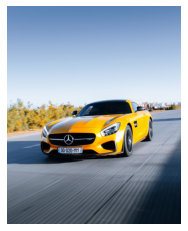

In [ ]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.show()

###Create 10 images from the image you uploaded using Keras ImageDataGenerator in TensorFlow and visualize that transformationed images (35 points).

In [ ]:
#---import the modules---
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

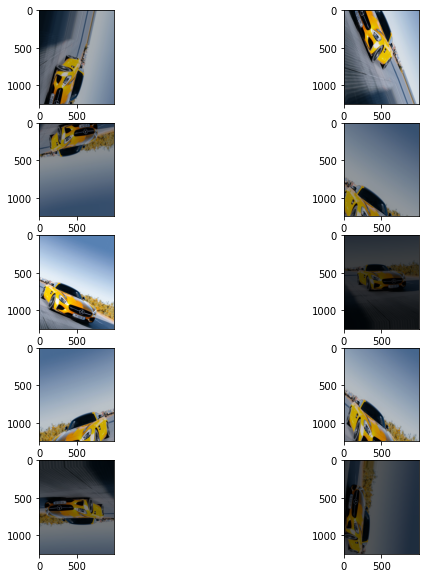

In [ ]:
#---load the image---
image_filename = path
img = load_img(image_filename)
#---convert the image to 3D array---
image_data = img_to_array(img)
#---convert into a 4-D array of 1 element of 3D array representing
# the image---
images_data = np.expand_dims(image_data, axis=0)
#---create image data augmentation generator---
datagen = ImageDataGenerator(width_shift_range=0.2,horizontal_flip=True,
                             rotation_range=90,
                             brightness_range=[0.2,1.0],
                             zoom_range=[0.5,1.0],
                             fill_mode='nearest',
                             vertical_flip=True
                             )
#---prepare the iterator; flow() takes in a 4D array and returns 
# an iterator containing a batch of images---
train_generator = datagen.flow(images_data, batch_size=1)
rows = 5
columns = 2
#---plot 5 rows and 4 columns---
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        #---get the next image in the batch (one image since batch 
        # size is 1)---
        image_batch = train_generator.next()
        
        #---convert to unsigned integers for viewing---
        image = image_batch[0].astype('uint8')
        #---show the image---
        axes[r,c].imshow(image)
#---set the size of the figure---
fig.set_size_inches(10,10)

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
# https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
# https://towardsdatascience.com/image-data-augmentation-for-deep-learning-77a87fabd2bf

# PART II: Using the pre-trained model 

### Upload an image from your computer one to your notebook (5 points).

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.jpg to iris.jpg


In [3]:
path = r'/content/iris.jpg'

### Show the image using matplotlib library (10 points).

In [1]:
from matplotlib import pyplot as plt
import cv2

In [4]:
img_color = cv2.imread(path,1)
img_grayscale = cv2.imread(path,0)
img_unchanged = cv2.imread(path,-1)

In [6]:
img= img_color
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)

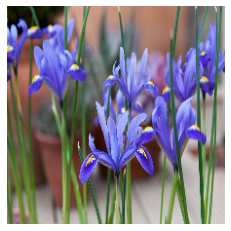

In [7]:
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Select the pre-trained ResNet50 model for image classification (15 points).

In [13]:
import PIL 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions 
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import resnet50

PIL image size (224, 224)


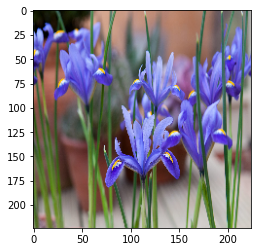

In [14]:
## load an image in PIL format 
original = load_img(path, target_size = (224, 224)) 
print('PIL image size',original.size)
# PIL image size (224, 224) 
plt.imshow(original) 
plt.show()

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


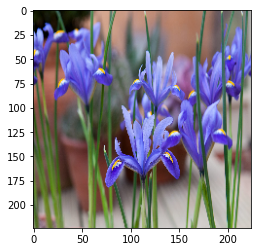

In [15]:
#convert the PIL image to a numpy array 
numpy_image = img_to_array(original) 

plt.imshow(np.uint8(numpy_image)) 

print('numpy array size',numpy_image.shape) 
# numpy array size (224, 224, 3) 

# Convert the image / images into batch format 
image_batch = np.expand_dims(numpy_image, axis = 0) 

print('image batch size', image_batch.shape) 
# image batch size (1, 224, 224, 3)

In [23]:
processed_image = resnet50.preprocess_input(image_batch.copy()) 

# create resnet model 
resnet_model = resnet50.ResNet50(weights = 'imagenet') 

### Predict your image using pre-trained model (20 points).

In [24]:
# get the predicted probabilities for each class 
predictions = resnet_model.predict(processed_image) 

1/1 [==============================] - 1s 1s/step


In [25]:
# convert the probabilities to class labels 
predictions = decode_predictions(predictions) 
print(predictions)



[[('n03991062', 'pot', 0.16884863), ('n11939491', 'daisy', 0.13904563), ('n12985857', 'coral_fungus', 0.10299627), ('n02206856', 'bee', 0.08651247), ('n03930313', 'picket_fence', 0.07894592)]]


In [26]:
for label in predictions[0]:
  print(label)

('n03991062', 'pot', 0.16884863)
('n11939491', 'daisy', 0.13904563)
('n12985857', 'coral_fungus', 0.10299627)
('n02206856', 'bee', 0.08651247)
('n03930313', 'picket_fence', 0.07894592)
